In [93]:
import numpy as np
import pandas as pd
from constants import *
import matplotlib.pyplot as plt

sb_data_file = 'D:/UVic/CSC503Proj/data/merged_data.csv'
sb_filtered_data_file = 'D:/UVic/CSC503Proj/data/filtered_data.csv'

unwanted_cols__ = ['Unnamed: 0', 'videoID', 'UUID', 'description', 'title', 'userID', 'channelID', 'incorrectVotes']

In [ ]:
# Read the file, filter the columns, and save the new file


# df = pd.read_csv(sb_data_file, low_memory=False)
# filtered_df = df.loc[:, ~df.columns.isin(unwanted_cols__)]
# filtered_df.to_csv(sb_filtered_data_file, index=False)

# print(f"Filtered data has been written to {sb_filtered_data_file}")

In [94]:
sb_data = pd.read_csv(sb_filtered_data_file, 
                      dtype=dtypes,
                      usecols=lambda col: col not in unwanted_cols__,
                      #converters={'timeSubmitted':convert_timestamp_to_seconds},
                      # skiprows=range(1, 6_000_000),
                      # nrows = 8_000_000,
                      na_values={'videoDuration': [0],
                                 'published': [0]})

pd.set_option('display.max_columns', None)
display(sb_data.head())

,startTime,endTime,votes,locked,timeSubmitted,views,category,actionType,videoDuration,hidden,reputation,shadowHidden,published,isVIP
0,714.00000,763.00000,64,False,1.564089e+09,386,sponsor,skip,NaN,0,0.0,False,1.529539e+09,False
1,446.51013,513.39233,225,False,1.564089e+09,3222,sponsor,skip,NaN,1,0.0,False,1.562458e+09,False
2,488.52150,542.11035,-2,False,1.564089e+09,25661,sponsor,skip,552.0,0,0.0,False,1.534032e+09,False
3,497.14310,569.15330,-2,False,1.564089e+09,24217,sponsor,skip,NaN,0,0.0,False,1.517443e+09,False
4,41.00000,53.00000,115,False,1.564089e+09,768,sponsor,skip,NaN,0,0.0,False,1.529539e+09,False


In [ ]:
# readCol = ['category']
# sb_data_cat = pd.read_csv(sb_filtered_data_file, 
#                       dtype=dtypes,
#                       usecols=lambda col: col in readCol)
# print(len(sb_data_cat))
# sb_data_cat['category'].value_counts()
# print(len(sb_data_cat))

In [95]:
print(len(sb_data))

15334922


In [96]:
sb_data['category'].value_counts()
sb_data = sb_data[sb_data['category'] != 'moreCategories']

In [97]:
print(len(sb_data))

15334918


In [98]:
# sb_data['category'].remove_unused_categories()
sb_data["category"].cat.remove_categories(['moreCategories'])
sb_data['category'].value_counts()

category
sponsor             3483201
intro               2742959
filler              2676918
outro               2107166
selfpromo           1339473
interaction         1177598
poi_highlight        771380
preview              421595
music_offtopic       404021
chapter              190634
exclusive_access      19973
moreCategories            0
Name: count, dtype: int64

In [99]:
fraction = 0.2

stratified_sample = sb_data.groupby('category', group_keys=False).apply(lambda x: x.sample(frac=fraction))
stratified_sample.reset_index(drop=True, inplace=True)

C:\Users\joyji\AppData\Local\Temp\ipykernel_6084\6632669.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = sb_data.groupby('category', group_keys=False).apply(lambda x: x.sample(frac=fraction))
C:\Users\joyji\AppData\Local\Temp\ipykernel_6084\6632669.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = sb_data.groupby('category', group_keys=False).apply(lambda x: x.sample(frac=fraction))


In [100]:
print(len(stratified_sample))

3066985


In [112]:
stratified_sample['category'].value_counts()

category
sponsor             696640
intro               548592
filler              535384
outro               421433
selfpromo           267895
interaction         235520
poi_highlight       154276
preview              84319
music_offtopic       80804
chapter              38127
exclusive_access      3995
moreCategories           0
Name: count, dtype: int64

In [ ]:
# stratified_sample['segmentDuration'] = stratified_sample['endTime']-stratified_sample['startTime']
# stratified_sample['scaledStart'] = stratified_sample['startTime']/stratified_sample['videoDuration']
# stratified_sample['scaledEnd'] = stratified_sample['endTime']/stratified_sample['videoDuration']
# stratified_sample['scaledSegmentDuration'] = stratified_sample['segmentDuration']/stratified_sample['videoDuration']
# stratified_sample['timeToSubmission'] = stratified_sample['timeSubmitted']-stratified_sample['published']

In [101]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [102]:
train_set, test_set = train_test_split(stratified_sample, test_size=0.2, random_state=42)
len(train_set), len(test_set)


sb = train_set.drop("category", axis=1)
sb_labels = train_set["category"].copy()
sb_test = test_set.drop("category", axis=1)


sb_labels_test = test_set["category"].copy()

sb.head()
# sb_labels.head()


,startTime,endTime,votes,locked,timeSubmitted,views,actionType,videoDuration,hidden,reputation,shadowHidden,published,isVIP
1775487,484.000,556.781,0,False,1.649502e+09,0,skip,556.781,0,0.0,False,1.614643e+09,False
2116207,745.743,776.396,0,False,1.688675e+09,247,skip,1376.641,0,0.0,False,NaN,False
875103,0.000,196.622,0,False,1.649961e+09,2,skip,19520.000,1,1.2,False,NaN,False
502825,2563.500,2568.000,0,False,1.657875e+09,0,skip,5802.000,2,0.0,False,1.606867e+09,False
2824427,58.696,129.359,0,False,1.732049e+09,38,skip,1598.161,0,0.0,False,NaN,False


In [103]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                            StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                        OneHotEncoder(handle_unknown='ignore'))

actiontype_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

num_attribs = ['startTime', 'endTime', 'votes', 'timeSubmitted', 'views', 'videoDuration', 'reputation', 'published']
cat_attribs = ['locked', 'hidden', 'shadowHidden', 'isVIP']


# num_attribs = ['startTime', 'endTime', 'votes', 'timeSubmitted', 'views', 'video duration', 'reputation', 'published']
# cat_attribs = ['locked', 'actionType', 'hidden', 'shadowHidden', 'isVIP']


preprocess_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), 
                                         ('cat', cat_pipeline, cat_attribs),
                                         ('action', actiontype_pipeline, ['actionType'])
                                        ])

# preprocess_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs)])


# sb_processed = preprocess_pipeline.fit_transform(sb)
# print(sb_processed[:5])

# sb_processed = pd.DataFrame(sb_processed,
# columns=preprocess_pipeline.get_feature_names_out())
# sb_processed.head()

In [104]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing the data
sb_processed = preprocess_pipeline.fit_transform(sb)
sb_test_processed = preprocess_pipeline.transform(sb_test)

print(sb_processed.shape)

(2453588, 22)


In [105]:
sb_labels = sb_labels.to_frame()
sb_labels_test = sb_labels_test.to_frame()

sb_labels.head()

,category
1775487,outro
2116207,selfpromo
875103,intro
502825,filler
2824427,sponsor


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
sb_labels_encoded = label_encoder.fit_transform(sb_labels)  # Train labels
sb_labels_test_encoded = label_encoder.transform(sb_labels_test)  # Test labels

# Convert to PyTorch tensors and move to device
X_train = torch.tensor(sb_processed, dtype=torch.float32).to(device)  # Feature data
y_train = torch.tensor(sb_labels_encoded, dtype=torch.long).to(device)  # Encoded labels
X_test = torch.tensor(sb_test_processed, dtype=torch.float32).to(device)
y_test = torch.tensor(sb_labels_test_encoded, dtype=torch.long).to(device)

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.network(x)

# Initialize the model, loss function, and optimizer, and move the model to the device
input_size = X_train.shape[1]
num_classes = len(label_encoder.classes_)  # Number of unique classes
model = NeuralNetwork(input_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5
model.train()
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Move inputs and labels to device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader)}")

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted_classes = torch.max(outputs, 1)
    true_classes = y_test

# Move predictions and true classes to CPU for evaluation
predicted_classes = predicted_classes.cpu()
true_classes = true_classes.cpu()

# Classification report
print("Classification Report:")
print(classification_report(true_classes.numpy(), predicted_classes.numpy(), target_names=label_encoder.classes_))

# Accuracy score
print(f"Accuracy Score: {accuracy_score(true_classes.numpy(), predicted_classes.numpy())}")


In [83]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score

label_encoder = LabelEncoder()
sb_labels_encoded = label_encoder.fit_transform(sb_labels)  # Train labels
sb_labels_test_encoded = label_encoder.transform(sb_labels_test)  # Test labels

# Dummy Classifier for Baseline
# Initialize the Dummy Classifier with "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="stratified")

# Fit the Dummy Classifier using the same training labels
dummy_clf.fit(sb_processed, sb_labels_encoded)

# Generate predictions for the test set
dummy_predictions = dummy_clf.predict(sb_test_processed)

# Evaluate the Dummy Classifier
dummy_accuracy = accuracy_score(sb_labels_test_encoded, dummy_predictions)
print(f"Dummy Classifier Accuracy: {dummy_accuracy:.4f}")

# Detailed Classification Report for the Dummy Classifier
print("Dummy Classifier Classification Report:")
print(classification_report(sb_labels_test_encoded, dummy_predictions, target_names=label_encoder.classes_))

C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Dummy Classifier Accuracy: 0.1509
Dummy Classifier Classification Report:
                  precision    recall  f1-score   support

         chapter       0.01      0.01      0.01      7612
exclusive_access       0.00      0.00      0.00       781
          filler       0.17      0.17      0.17    107266
     interaction       0.08      0.08      0.08     47128
           intro       0.18      0.18      0.18    109578
  music_offtopic       0.03      0.03      0.03     16241
           outro       0.14      0.14      0.14     84434
   poi_highlight       0.05      0.05      0.05     30633
         preview       0.03      0.03      0.03     16774
       selfpromo       0.09      0.09      0.09     53298
         sponsor       0.23      0.23      0.23    139652

        accuracy                           0.15    613397
       macro avg       0.09      0.09      0.09    613397
    weighted avg       0.15      0.15      0.15    613397



In [108]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the labels
label_encoder = LabelEncoder()
sb_labels_encoded = label_encoder.fit_transform(sb_labels)  # Train labels
sb_labels_test_encoded = label_encoder.transform(sb_labels_test)  # Test labels

# Define dummy classifier strategies
strategies = ["most_frequent", "stratified", "uniform", "constant", "prior"]
results = []

# Iterate through strategies
for strategy in strategies:
    if strategy == "constant":
        # DummyClassifier with constant strategy needs a specific constant value
        dummy_clf = DummyClassifier(strategy="constant", constant=0)
    else:
        dummy_clf = DummyClassifier(strategy=strategy)
    
    # Fit the Dummy Classifier using the same training labels
    dummy_clf.fit(sb_processed, sb_labels_encoded)

    # Generate predictions for the test set
    dummy_predictions = dummy_clf.predict(sb_test_processed)

    # Evaluate the Dummy Classifier
    dummy_accuracy = accuracy_score(sb_labels_test_encoded, dummy_predictions)
    
    # Append results
    results.append({"Strategy": strategy, "Accuracy (%)": dummy_accuracy * 100})

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)
print(results_df)

# Display the table
# import ace_tools as tools; tools.display_dataframe_to_user(name="Dummy Classifier Accuracies", dataframe=results_df)


C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


        Strategy  Accuracy (%)
0  most_frequent     22.766985
1     stratified     15.165871
2        uniform      9.078134
3       constant      1.240958
4          prior     22.766985


In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Convert labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
sb_labels_encoded = label_encoder.fit_transform(sb_labels)  # Train labels
sb_labels_test_encoded = label_encoder.transform(sb_labels_test)  # Test labels

# Decision trees do not require GPU; convert data to NumPy arrays
X_train = sb_processed  # Already processed feature data
y_train = sb_labels_encoded  # Encoded train labels
X_test = sb_test_processed
y_test = sb_labels_test_encoded  # Encoded test labels

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on train data
y_train_pred = dt_classifier.predict(X_train)

# Make predictions on test data
y_test_pred = dt_classifier.predict(X_test)

# Evaluate the model on training data
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print(f"Decision Tree Classifier Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Decision Tree Classifier Test Accuracy: {test_accuracy:.4f}")

# Classification report for test data
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Decision Tree Classifier Test Accuracy: 0.6026

Classification Report (Test Data):
                  precision    recall  f1-score   support

         chapter       1.00      1.00      1.00      7612
exclusive_access       0.28      0.31      0.30       781
          filler       0.85      0.85      0.85    107266
     interaction       0.27      0.27      0.27     47128
           intro       0.59      0.59      0.59    109578
  music_offtopic       0.29      0.29      0.29     16241
           outro       0.68      0.67      0.67     84434
   poi_highlight       1.00      1.00      1.00     30633
         preview       0.24      0.25      0.24     16774
       selfpromo       0.22      0.22      0.22     53298
         sponsor       0.62      0.61      0.61    139652

        accuracy                           0.60    613397
       macro avg       0.55      0.55      0.55    613397
    weighted avg       0.61      0.60      0.60    613397



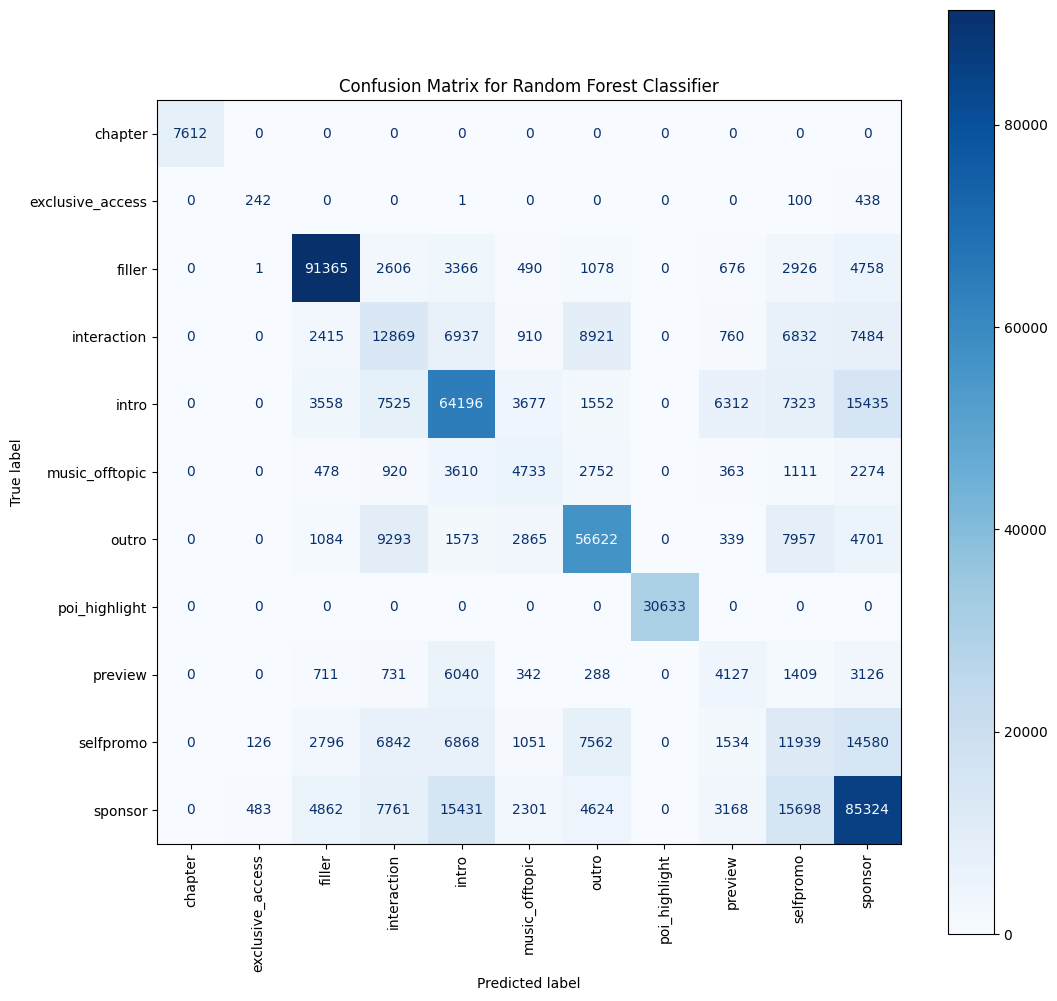

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix with increased figure size
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figure size for better readability
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Encode the labels to numeric values
label_encoder = LabelEncoder()
sb_labels_encoded = label_encoder.fit_transform(sb_labels)  # Train labels
sb_labels_test_encoded = label_encoder.transform(sb_labels_test)  # Test labels

# Use the processed features and encoded labels
X_train = sb_processed  # Preprocessed training features
y_train = sb_labels_encoded  # Encoded training labels
X_test = sb_test_processed  # Preprocessed test features
y_test = sb_labels_test_encoded  # Encoded test labels

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,           # Number of trees in the forest
    max_depth=None,             # Allow the trees to grow fully
    random_state=42,            # Ensures reproducibility
    class_weight="balanced",    # Handle imbalanced classes
    n_jobs=-1                   # Use all available cores for faster computation
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Random Forest Classifier Test Accuracy: {accuracy:.4f}")

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Random Forest Classifier Test Accuracy: 0.6915
Classification Report:
                  precision    recall  f1-score   support

         chapter       1.00      1.00      1.00      7612
exclusive_access       0.36      0.20      0.25       781
          filler       0.94      0.86      0.90    107266
     interaction       0.42      0.20      0.27     47128
           intro       0.63      0.79      0.70    109578
  music_offtopic       0.52      0.32      0.39     16241
           outro       0.63      0.89      0.74     84434
   poi_highlight       1.00      1.00      1.00     30633
         preview       0.49      0.21      0.29     16774
       selfpromo       0.41      0.14      0.20     53298
         sponsor       0.65      0.76      0.70    139652

        accuracy                           0.69    613397
       macro avg       0.64      0.58      0.59    613397
    weighted avg       0.67      0.69      0.66    613397



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm_ = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix with increased figure size
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figure size for better readability
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


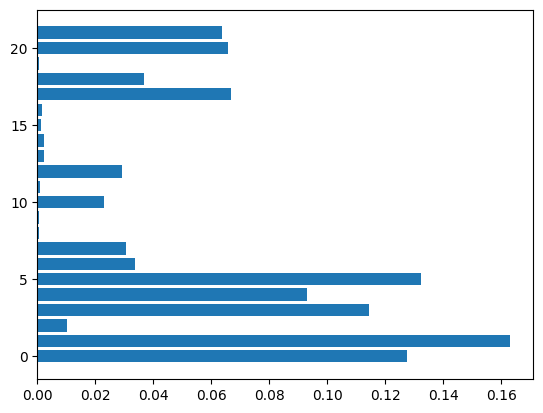

[0.12770348 0.16298645 0.01032831 0.11450652 0.09300183 0.13250952
 0.03353714 0.0304275  0.00068892 0.00062588 0.0230874  0.00081519
 0.02904214 0.00228775 0.00220922 0.00131863 0.00154314 0.06667305
 0.0366885  0.00050599 0.06590429 0.06360916]


In [92]:
import matplotlib.pyplot as plt
feature_importances = rf_classifier.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances)
plt.show()
print(feature_importances)

In [109]:
!pip install tabulate

In [111]:
from tabulate import tabulate

# Data
data = [
    {"Strategy": "most_frequent", "Accuracy (%)": 22.766985},
    {"Strategy": "stratified", "Accuracy (%)": 15.165871},
    {"Strategy": "uniform", "Accuracy (%)": 9.078134},
]

# Sort the data by Accuracy (%) in descending order
sorted_data = sorted(data, key=lambda x: x["Accuracy (%)"], reverse=True)

# Format data for tabulate
table_data = [[row["Strategy"], f"{row['Accuracy (%)']:.2f}"] for row in sorted_data]

# Create and display the table
table = tabulate(table_data, headers=["Strategy", "Accuracy (%)"], tablefmt="grid")
print(table)


+---------------+----------------+
| Strategy      |   Accuracy (%) |
+===============+================+
| most_frequent |          22.77 |
+---------------+----------------+
| stratified    |          15.17 |
+---------------+----------------+
| uniform       |           9.08 |
+---------------+----------------+
